# **Classification Analysis Using the SVM Algorithm Method**

> **Case: Online Shopper Purchasing Intention**

> **Table of Contents:**


1.   Data preparation
2.   Descriptive analysis
3.   Separating features and labels
4.   Splitting dataset into training set and testing set
5.   Performing SVM using kernel
6.   Performing SVM by taking K-Folds Cross Validation
7.   Performing SVM by taking parameters
8.   Confusion matrix




## **1. Data preparation**

In [ ]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [ ]:
# Import dataset
df = pd.read_csv("/content/online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

We can see that there are no missing values ​​in the dataset and it seems that there are variables with Booleans and object data types.

Therefore, we will convert the string value to a type integer by using Label Encoder in the scikit-learn library.

In [ ]:
# Converting string value to int type

from sklearn.preprocessing import LabelEncoder

df['VisitorType'] = LabelEncoder().fit_transform(df['VisitorType'])
df['Weekend'] = LabelEncoder().fit_transform(df['Weekend'])
df['Revenue'] = LabelEncoder().fit_transform(df['Revenue'])

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,2,1,0


We will delete an unnecessary attribute like the month column which has a data type object.

In [ ]:
# drop month column
df = df.drop(['Month'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  OperatingSystems         12330 non-null  int64  
 11  Browser                  12330 non-null  int64  
 12  Region                   12330 non-null  int64  
 13  TrafficType              12330 non-null  int64  
 14  VisitorType           

To ensure that our data is completely clean and ready for analysis, we will look for missing values ​​in the dataset.

In [ ]:
# check for missing values in variables

df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

We can see that there are no missing values in the dataset.

## **2. Descriptive analysis**

Now we will explore the data with descriptive analysis to gain insights into the dataset used.

In [ ]:
# view dimensions of dataset

df.shape

(12330, 17)

We can see that there are 12,330 instances and 17 attributes in our dataset.


As we know earlier, the 'Revenue' attribute can be used as the class label. So we will check the distribution on the class label.

In [ ]:
# check distribution of class column

df['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [ ]:
# view the percentage distribution of class column

df['Revenue'].value_counts()/np.float(len(df))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


0    0.845255
1    0.154745
Name: Revenue, dtype: float64

Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest 15.5% (1,908) were positive class samples ending with shopping.

Then, we can use describe to get statistical summary of each attribute.

In [ ]:
# view summary statistics in numerical variables

round(df.describe(),2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00
mean,2.32,80.82,0.50,34.47,31.73,1194.75,0.02,0.04,5.89,0.06,2.12,2.36,3.15,4.07,1.72,0.23,0.15
std,3.32,176.78,1.27,140.75,44.48,1913.67,0.05,0.05,18.57,0.20,0.91,1.72,2.40,4.03,0.69,0.42,0.36
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,7.00,184.14,0.00,0.01,0.00,0.00,2.00,2.00,1.00,2.00,2.00,0.00,0.00
50%,1.00,7.50,0.00,0.00,18.00,598.94,0.00,0.03,0.00,0.00,2.00,2.00,3.00,2.00,2.00,0.00,0.00
75%,4.00,93.26,0.00,0.00,38.00,1464.16,0.02,0.05,0.00,0.00,3.00,2.00,4.00,4.00,2.00,0.00,0.00
max,27.00,3398.75,24.00,2549.38,705.00,63973.52,0.20,0.20,361.76,1.00,8.00,13.00,9.00,20.00,2.00,1.00,1.00


## **3. Separating features and labels**

The iloc indexer for Python Pandas selects rows and columns from data frames. Then we use iloc to retrieve all attribute columns which will be variable X without including the 'Revenue' column which is the class label (variable Y).

In [ ]:
# separating features and label
x=df.iloc[:, :-1]
x.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,2,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,2,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,2,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,2,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,2,1


In [ ]:
y=df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Revenue, dtype: int64

**Data standardization.** Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data.


In [ ]:
# data standardization
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

## **4. Splitting dataset into training set and testing set**

Splitting dataset into training set and testing set for better generalization.

In [ ]:
# splitting dataset into training set and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

## **5. Performing SVM using kernel**

In this analysis we will use 3 types of kernels: linear, rbf, and polynomial kernels.

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

In [ ]:
# Running SVM with default linear kernel
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8921330089213301


In [ ]:
# Running SVM with default rbf kernel
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8986212489862125


In [ ]:
# Running SVM with default polynomial kernel
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8909164639091647


From the results above, we got the accuracy score for: linear kernel= 89.21%, rbf kernel = 89.86%, and polynomial kernel = 89.09%. We can see that using the rbf kernel produces the highest accuracy score. The polynomial kernel is performing poorly. The reason behind this maybe it is overfitting the training dataset.

## **6. Performing SVM by taking K-Folds Cross Validation**

Cross validation is a technique for assessing how the statistical analysis generalizes to an independent data set. It is a technique for evaluating machine learning models by training several models on subsets of the available input data and evaluating them on the complementary subset of the data.

In [ ]:
# Performing K-fold cross validation with different kernels
from sklearn.model_selection import cross_val_score

In [ ]:
# CV on linear kernel
svc=SVC(kernel='linear')
scores = cross_val_score(svc, x, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)
print(scores.mean())

[0.90592052 0.90592052 0.91484185 0.88240065 0.89375507 0.87185726
 0.87104623 0.86618005 0.87429035 0.86374696]
0.8849959448499594


In [ ]:
# CV on rbf kernel
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, x, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)
print(scores.mean())

[0.91403082 0.91321979 0.92295215 0.88564477 0.89618816 0.88158962
 0.86699108 0.8702352  0.8783455  0.8702352 ]
0.8899432278994321


In [ ]:
# CV on polynomial kernel
svc=SVC(kernel='poly')
scores = cross_val_score(svc, x, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)
print(scores.mean())

[0.90592052 0.89781022 0.90754258 0.87753447 0.88969992 0.87510138
 0.86293593 0.86699108 0.87185726 0.8621249 ]
0.8817518248175181


From the results above, by performing K-fold cross validation with different kernels, we got the accuracy score for: linear kernel= 88.49%, rbf kernel = 88.99%, and polynomial kernel = 88.17%. We can see that using the rbf kernel with K=10 produces the highest accuracy score.

## **7. Performing SVM by taking parameters**

### **Using the C parameter in the linear kernel**

In [ ]:
# linear kernel
C_values=list(np.arange(0.1,1,0.1))
acc_score=[]
for c in C_values:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, x, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

[0.8847526358475264, 0.8846715328467154, 0.8847526358475264, 0.8848337388483374, 0.8847526358475264, 0.8848337388483374, 0.8849959448499594, 0.8849148418491483, 0.8849959448499594]


Text(0, 0.5, 'Cross-Validated Accuracy')

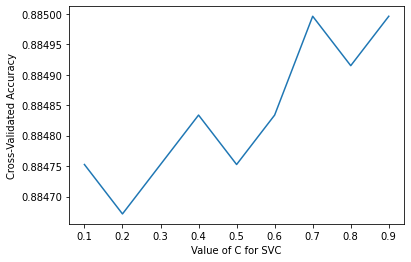

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


C_values=list(np.arange(0.1,1,0.1))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0.1,1,0.1))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

From the plot above, we can see that accuracy has been close to 88.5% for C=0.69. Thus C= 0.69 is the best parameter.

### **Using the gamma parameter in the rbf kernel**

In [ ]:
gamma_range=[0.0001,0.001,0.01,0.1]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, x, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

[0.8548256285482564, 0.8824817518248175, 0.8894566098945662, 0.8897810218978102]


Text(0, 0.5, 'Cross-Validated Accuracy')

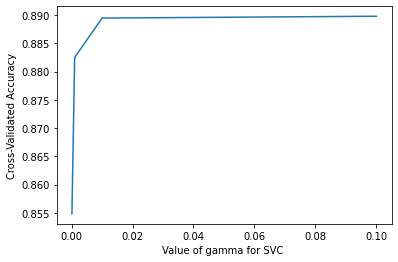

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

From the plot above, the score increases steadily from 0.01 to 0.1 and reaches its peak at 0.10 with an accuracy score close to 89%. Thus gamma = 0.1 is the best parameter.

### **Using the degree parameter in the polynomial kernel**

In [ ]:
degree=[2,3,4,5,6]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, x, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)  

[0.8788321167883211, 0.8817518248175181, 0.8759124087591241, 0.8720194647201946, 0.8683698296836984]


Text(0, 0.5, 'Cross-Validated Accuracy')

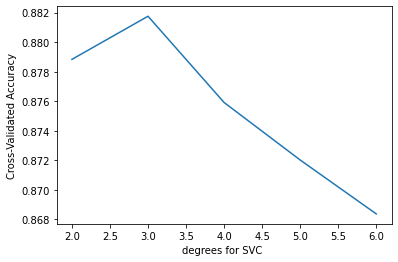

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

degree=[2,3,4,5,6]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(degree,acc_score)
plt.xlabel('degrees for SVC ')
plt.ylabel('Cross-Validated Accuracy')

From the plot above, the score reaches its peak in the 3rd degree with an accuracy score close to 88.2% and then decreases drastically. Thus degree = 3 is the best parameter.

### **Comparing models with and without using K-folds cross validation and parameters**

In [ ]:
from sklearn.svm import SVC
svc= SVC(kernel='linear',C=0.69)
svc.fit(x_train,y_train)
y_predict=svc.predict(x_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print(accuracy_score)

0.8921330089213301


In [ ]:
svc=SVC(kernel='linear',C=0.69)
scores = cross_val_score(svc, x, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.90592052 0.90592052 0.91484185 0.88240065 0.89294404 0.87185726
 0.87104623 0.86618005 0.87429035 0.86374696]
0.8849148418491483


In [ ]:
from sklearn.svm import SVC
svc= SVC(kernel='rbf',gamma=0.1)
svc.fit(x_train,y_train)
y_predict=svc.predict(x_test)
metrics.accuracy_score(y_test,y_predict)

0.8994322789943228

In [ ]:
svc=SVC(kernel='rbf',gamma=0.1)
scores = cross_val_score(svc, x, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.91484185 0.91565288 0.91970803 0.88564477 0.89618816 0.88158962
 0.8702352  0.86780211 0.87510138 0.87104623]
0.8897810218978102


In [ ]:
from sklearn.svm import SVC
svc= SVC(kernel='poly',degree=3)
svc.fit(x_train,y_train)
y_predict=svc.predict(x_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print(accuracy_score)

0.8909164639091647


In [ ]:
svc=SVC(kernel='poly',degree=3)
scores = cross_val_score(svc, x, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.90592052 0.89781022 0.90754258 0.87753447 0.88969992 0.87510138
 0.86293593 0.86699108 0.87185726 0.8621249 ]
0.8817518248175181


To summarize the results above, we can see that the accuracy score obtained without using K-folds cross validation and optimized parameters have slightly better results. But it may fail to generalize the unseen data. Hence it is advisable to perform K-fold cross validation where all the data is covered so it may predict unseen data well.

### **Grid search technique**

In [ ]:
# Let us perform Grid search technique to find the best parameter
from sklearn.svm import SVC
svm_model= SVC()
tuned_parameters = {
 'gamma': [0.0001,0.001,0.01,0.1], 'kernel': ['rbf']}

In [ ]:
from sklearn.model_selection import GridSearchCV
model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

In [ ]:
model_svm.fit(x_train, y_train)
print(model_svm.best_score_)

0.8901070919930701


In [ ]:
print(model_svm.best_params_)

{'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
y_pred= model_svm.predict(x_test)
print(metrics.accuracy_score(y_pred,y_test))

0.8994322789943228


We got maximum accuracy by using the rbf kernel with gamma = 0.1 and K=10. The accuracy of the score is 89.94%. Based on the SVM analysis above, we can conclude that the accuracy of our classification model is very good. Our model does an excellent job of predicting class labels.

## **8. Confusion Matrix**

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[2049   66]
 [ 182  169]]

True Positives(TP) =  2049

True Negatives(TN) =  169

False Positives(FP) =  66

False Negatives(FN) =  182


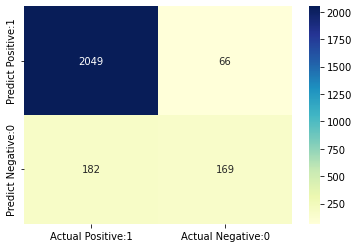

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2115
           1       0.72      0.48      0.58       351

    accuracy                           0.90      2466
   macro avg       0.82      0.73      0.76      2466
weighted avg       0.89      0.90      0.89      2466



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8994


Based on the prediction results we can conclude that shoppers who do not intend to buy the product are correctly predicted not to buy the product on the ABC online store web page as many as 2,049 shoppers. So that the class recall value is equal to 97% with the accuracy of the score is 89.94%.